In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [36]:
train = pd.read_csv('sliceddata.csv',header=0, names=['target','id','date','query','username','txt'])

In [37]:
train.head(10)

,target,id,date,query,username,txt
0,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
5,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
6,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...
7,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a..."
8,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
9,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [38]:
train.shape

(40000, 6)

In [39]:
test= pd.read_csv('testdata.manual.2009.06.14.csv', header=None, names=['target','id','date','query','username','txt'])

In [40]:
test.head(10)

,target,id,date,query,username,txt
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [41]:
train.dtypes

target       int64
id           int64
date        object
query       object
username    object
txt         object
dtype: object

In [42]:
test.shape

(498, 6)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    40000 non-null  int64 
 1   id        40000 non-null  int64 
 2   date      40000 non-null  object
 3   query     40000 non-null  object
 4   username  40000 non-null  object
 5   txt       40000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   query     498 non-null    object
 4   username  498 non-null    object
 5   txt       498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


In [45]:
train.columns

Index(['target', 'id', 'date', 'query', 'username', 'txt'], dtype='object')

In [46]:
train.target.unique()

array([4, 0], dtype=int64)

In [47]:
train['target']=train['target'].replace([0,4],['negative','positive'])
train.head()

,target,id,date,query,username,txt
0,positive,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,positive,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,positive,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,positive,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,positive,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [48]:
positives = train['target'][train.target == 'positive' ]
negatives = train['target'][train.target == 'negative' ]
print('la longueur de notre date est:         {}'.format(train.shape[0]))
print('No. des commentaire positives sont:  {}'.format(len(positives)))
print('No. des commentaire negatives sont: {}'.format(len(negatives)))

la longueur de notre date est:         40000
No. des commentaire positives sont:  20000
No. des commentaire negatives sont: 20000


In [49]:
train['target'].value_counts().values[0]

20000

In [50]:
train['target'].value_counts().values[1]

20000

In [51]:
train.describe()

,id
count,4.000000e+04
mean,1.509290e+09
std,4.183818e+07
min,1.467810e+09
25%,1.468740e+09
50%,1.470148e+09
75%,1.551806e+09
max,1.556976e+09


In [52]:
def word_count(words):
    return len(words.split())

                          la frequence du nombre des mots dans les tweets


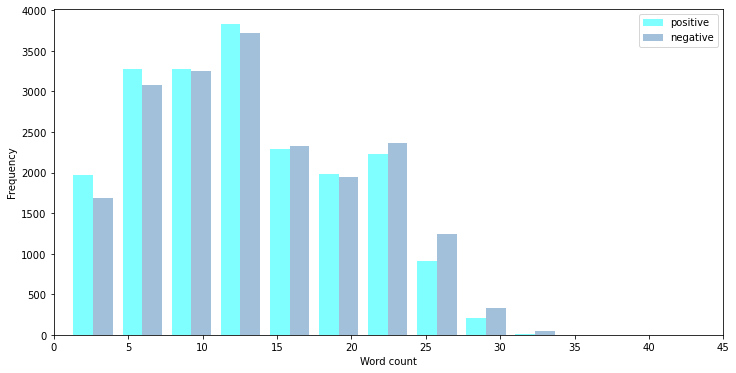

In [53]:
train['word count'] = train['txt'].apply(word_count)
p = train['word count'][train.target == 'positive']
n = train['word count'][train.target == 'negative']
print('                          la frequence du nombre des mots dans les tweets')
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.hist([p, n], color = ['cyan', 'steelblue'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

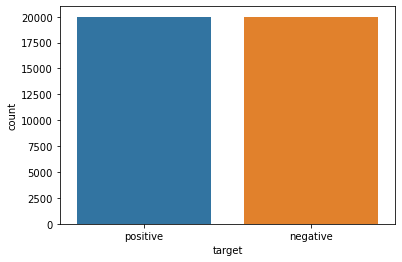

In [55]:
%matplotlib inline
sns.countplot(train['target'])
